In [1]:
import pandas as pd

df = pd.read_excel('Cleaned_S&P_500_Composition_Changes.xlsx', sheetname=4)
df_adjusted_prices_ts = pd.read_excel('Cleaned_Researcher_Dataset.xlsx', sheetname=5)

In [2]:
print(df.shape)
print(df_adjusted_prices_ts.shape)

(1531, 194)
(1366, 250)


In [3]:
labels = df.columns.tolist()[0:2]
dates = df.columns.tolist()[2:]

dates = [date.strftime("%Y-%m-%d %H:%M:%S")[0:10] for date in dates]
df.columns = labels + dates

In [4]:
df.head()

,Ticker,Name,2016-12-31,2016-11-30,2016-10-31,2016-09-30,2016-08-31,2016-07-31,2016-06-30,2016-03-31,...,1972-06-30,1972-03-31,1971-12-31,1971-09-30,1971-06-30,1971-03-31,1970-12-31,1970-09-30,1970-06-30,1970-03-31
0,A,Agilent Technologies Inc.,Health Care,Health Care,Health Care,Health Care,Health Care,Health Care,Health Care,Health Care,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A (Anaco),Anaconda Co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Materials,Materials,Materials,Materials,Materials,Materials,Materials,Materials,Materials,Materials
2,AA,Alcoa Inc,NaN,NaN,Materials,Materials,Materials,Materials,Materials,Materials,...,Materials,Materials,Materials,Materials,Materials,Materials,Materials,Materials,Materials,Materials
3,AAF,American Air Filter Inc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AAL,American Airlines Group,Industrials,Industrials,Industrials,Industrials,Industrials,Industrials,Industrials,Industrials,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Get all the companies that were in the index at a given date
companies_end_of_2016 = df[["Name", "2016-12-31"]].dropna()
companies_end_of_2016

,Name,2016-12-31
0,Agilent Technologies Inc.,Health Care
4,American Airlines Group,Industrials
6,Advance Auto Parts Inc,Consumer Discretionary
7,Apple Inc.,Information Technology
9,AbbVie Inc.,Health Care
10,AmerisourceBergen Corp.,Health Care
15,Abbott Laboratories,Health Care
20,Accenture plc,Information Technology
28,Adobe Systems Inc.,Information Technology
30,Analog Devices Inc.,Information Technology


In [6]:
columns_list = df.columns.tolist()
columns_list.remove("Ticker")
columns_list.remove("Name")
date_columns_list = columns_list

In [7]:
import numpy as np

df['industry'] = df.apply(lambda x: set(x[date_columns_list].dropna().tolist()), axis=1)

In [8]:
df.head()

,Ticker,Name,2016-12-31,2016-11-30,2016-10-31,2016-09-30,2016-08-31,2016-07-31,2016-06-30,2016-03-31,...,1972-03-31,1971-12-31,1971-09-30,1971-06-30,1971-03-31,1970-12-31,1970-09-30,1970-06-30,1970-03-31,industry
0,A,Agilent Technologies Inc.,Health Care,Health Care,Health Care,Health Care,Health Care,Health Care,Health Care,Health Care,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{Health Care, Information Technology}"
1,A (Anaco),Anaconda Co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Materials,Materials,Materials,Materials,Materials,Materials,Materials,Materials,Materials,{Materials}
2,AA,Alcoa Inc,NaN,NaN,Materials,Materials,Materials,Materials,Materials,Materials,...,Materials,Materials,Materials,Materials,Materials,Materials,Materials,Materials,Materials,{Materials}
3,AAF,American Air Filter Inc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{Industrials}
4,AAL,American Airlines Group,Industrials,Industrials,Industrials,Industrials,Industrials,Industrials,Industrials,Industrials,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{Industrials}


In [9]:
labels = df_adjusted_prices_ts.columns.tolist()[0:2]
dates = df_adjusted_prices_ts.columns.tolist()[2:]

dates = [date.strftime("%Y-%m-%d %H:%M:%S")[0:10] for date in dates]
df_adjusted_prices = df_adjusted_prices_ts
df_adjusted_prices.columns = labels + dates
df_adjusted_prices.head()

,Ticker,Company Name,1979-03-31,1979-06-30,1979-09-30,1979-12-31,1980-03-31,1980-06-30,1980-09-30,1980-12-31,...,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31
0,A,Agilent Technologies Inc.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,86.53,89.10,99.92,96.84,105.03,102.56,103.05,95.35,96.25,100.0
1,AA,Alcoa Inc.,12.8,12.22,14.2,13.41,14.41,14.74,18.4,15.31,...,93.90,109.48,91.15,91.15,104.42,99.41,100.00,NaN,NaN,NaN
2,AAL,American Airlines Group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,87.13,73.70,68.01,60.34,75.66,77.58,78.24,86.77,99.46,100.0
3,AAL (Alex),Alexander & Alexander,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AAP,Advance Auto Parts Inc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,94.68,92.18,90.85,95.49,100.35,92.98,88.14,82.80,100.32,100.0


In [10]:
df_components = pd.read_excel('Cleaned_Component_Weightings.xlsx')
labels = df_components.columns.tolist()[0:2]
dates = df_components.columns.tolist()[2:]

dates = [date.strftime("%Y-%m-%d %H:%M:%S")[0:10] for date in dates]
df_components.columns = labels + dates
df_components = df_components.set_index("Ticker")
df_components.head()

,Company Name,2016-12-31,2016-09-30,2016-06-30,2016-03-31,2015-12-31,2015-09-30,2015-06-30,2015-03-31,2014-12-31,...,1981-06-30,1981-03-31,1980-12-31,1980-09-30,1980-06-30,1980-03-31,1979-12-31,1979-09-30,1979-06-30,1979-03-31
Ticker,,,,,,,,,,,,,,,,,,,,,
A,Agilent Technologies Inc.,0.000767,0.000815,0.000799,0.000727,0.000776,0.000680,0.000712,0.000767,0.000757,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A (Anaco),Anaconda Co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA,Alcoa Inc.,NaN,0.000712,0.000670,0.000701,0.000723,0.000756,0.000755,0.000868,0.001026,...,0.002416,0.002741,0.002343,0.003054,0.002716,0.003009,0.002697,0.002873,0.002676,0.002877
AAF,American Air Filter Inc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAL,American Airlines Group,0.001256,0.001035,0.000900,0.001376,0.001492,0.001486,0.001500,0.002012,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.industry = df.industry.tolist()
df.head()

,Ticker,Name,2016-12-31,2016-11-30,2016-10-31,2016-09-30,2016-08-31,2016-07-31,2016-06-30,2016-03-31,...,1972-03-31,1971-12-31,1971-09-30,1971-06-30,1971-03-31,1970-12-31,1970-09-30,1970-06-30,1970-03-31,industry
0,A,Agilent Technologies Inc.,Health Care,Health Care,Health Care,Health Care,Health Care,Health Care,Health Care,Health Care,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{Health Care, Information Technology}"
1,A (Anaco),Anaconda Co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Materials,Materials,Materials,Materials,Materials,Materials,Materials,Materials,Materials,{Materials}
2,AA,Alcoa Inc,NaN,NaN,Materials,Materials,Materials,Materials,Materials,Materials,...,Materials,Materials,Materials,Materials,Materials,Materials,Materials,Materials,Materials,{Materials}
3,AAF,American Air Filter Inc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{Industrials}
4,AAL,American Airlines Group,Industrials,Industrials,Industrials,Industrials,Industrials,Industrials,Industrials,Industrials,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{Industrials}


In [12]:
df = df[["Ticker", "Name", "industry"]]
df["Industry"] = df.industry
df.drop("industry", axis=1)
df = df.set_index("Ticker")

In [13]:
df = df[["Name", "Industry"]]
df.head()

,Name,Industry
Ticker,,
A,Agilent Technologies Inc.,"{Health Care, Information Technology}"
A (Anaco),Anaconda Co,{Materials}
AA,Alcoa Inc,{Materials}
AAF,American Air Filter Inc,{Industrials}
AAL,American Airlines Group,{Industrials}


In [14]:
df_adjusted_prices = pd.read_excel('Cleaned_Researcher_Dataset.xlsx', sheetname=5)
labels = df_adjusted_prices.columns.tolist()[0:2]
dates = df_adjusted_prices.columns.tolist()[2:]

dates = [date.strftime("%Y-%m-%d %H:%M:%S")[0:10] for date in dates]
df_adjusted_prices.columns = labels + dates
df_adjusted_prices = df_adjusted_prices.set_index("Ticker")
df_adjusted_prices.head()

,Company Name,1979-03-31,1979-06-30,1979-09-30,1979-12-31,1980-03-31,1980-06-30,1980-09-30,1980-12-31,1981-03-31,...,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31
Ticker,,,,,,,,,,,,,,,,,,,,,
A,Agilent Technologies Inc.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,86.53,89.10,99.92,96.84,105.03,102.56,103.05,95.35,96.25,100.0
AA,Alcoa Inc.,12.8,12.22,14.2,13.41,14.41,14.74,18.4,15.31,18.21,...,93.90,109.48,91.15,91.15,104.42,99.41,100.00,NaN,NaN,NaN
AAL,American Airlines Group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,87.13,73.70,68.01,60.34,75.66,77.58,78.24,86.77,99.46,100.0
AAL (Alex),Alexander & Alexander,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAP,Advance Auto Parts Inc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,94.68,92.18,90.85,95.49,100.35,92.98,88.14,82.80,100.32,100.0


In [15]:
df_components.head()

,Company Name,2016-12-31,2016-09-30,2016-06-30,2016-03-31,2015-12-31,2015-09-30,2015-06-30,2015-03-31,2014-12-31,...,1981-06-30,1981-03-31,1980-12-31,1980-09-30,1980-06-30,1980-03-31,1979-12-31,1979-09-30,1979-06-30,1979-03-31
Ticker,,,,,,,,,,,,,,,,,,,,,
A,Agilent Technologies Inc.,0.000767,0.000815,0.000799,0.000727,0.000776,0.000680,0.000712,0.000767,0.000757,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A (Anaco),Anaconda Co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA,Alcoa Inc.,NaN,0.000712,0.000670,0.000701,0.000723,0.000756,0.000755,0.000868,0.001026,...,0.002416,0.002741,0.002343,0.003054,0.002716,0.003009,0.002697,0.002873,0.002676,0.002877
AAF,American Air Filter Inc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAL,American Airlines Group,0.001256,0.001035,0.000900,0.001376,0.001492,0.001486,0.001500,0.002012,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df = pd.concat([df,df_adjusted_prices], axis=1)

In [17]:
df = df.drop('Company Name', axis=1)
df.head()

,Name,Industry,1979-03-31,1979-06-30,1979-09-30,1979-12-31,1980-03-31,1980-06-30,1980-09-30,1980-12-31,...,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31
A,Agilent Technologies Inc.,"{Health Care, Information Technology}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,86.53,89.10,99.92,96.84,105.03,102.56,103.05,95.35,96.25,100.0
A (Anaco),Anaconda Co,{Materials},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA,Alcoa Inc,{Materials},12.8,12.22,14.2,13.41,14.41,14.74,18.4,15.31,...,93.90,109.48,91.15,91.15,104.42,99.41,100.00,NaN,NaN,NaN
AAF,American Air Filter Inc,{Industrials},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAL,American Airlines Group,{Industrials},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,87.13,73.70,68.01,60.34,75.66,77.58,78.24,86.77,99.46,100.0


In [18]:
df.shape

(1531, 250)

In [19]:
def get_growth(start_value, end_value):
    return ((end_value/start_value)**(1/15))

training_data = df[["Industry", "1984-12-31", "1999-12-31"]].dropna()
training_data["avg_annualized_growth"] = training_data.apply(lambda x: get_growth(x["1984-12-31"], x["1999-12-31"]), axis=1)

In [20]:
training_data['Industry'] = training_data['Industry'].apply(str)
training_data.head()

,Industry,1984-12-31,1999-12-31,avg_annualized_growth
AA,{'Materials'},23.00,305.37,1.188155
AAPL,{'Information Technology'},0.36,2.89,1.148964
ABI,{'Health Care'},15.02,184.76,1.182123
ABS,{'Consumer Staples'},9.13,103.41,1.175636
ABT,{'Health Care'},1.51,28.67,1.216830


In [21]:
training_data.groupby("Industry")["avg_annualized_growth"].count()

Industry
{'Consumer Discretionary', 'Financials'}           1
{'Consumer Discretionary'}                        46
{'Consumer Staples', 'Consumer Discretionary'}     1
{'Consumer Staples'}                              34
{'Energy', 'Utilities'}                            1
{'Energy'}                                        17
{'Financials'}                                    16
{'Health Care'}                                   19
{'Industrials', 'Consumer Discretionary'}          2
{'Industrials'}                                   41
{'Information Technology'}                        20
{'Materials', 'Consumer Discretionary'}            1
{'Materials', 'Real Estate', 'Financials'}         1
{'Materials'}                                     29
{'Telecommunications'}                             6
{'Utilities'}                                     24
Name: avg_annualized_growth, dtype: int64

In [22]:
training_data.groupby("Industry")["avg_annualized_growth"].mean().sort_values(ascending=False)

Industry
{'Telecommunications'}                            1.196307
{'Consumer Staples'}                              1.190724
{'Health Care'}                                   1.184449
{'Financials'}                                    1.175934
{'Consumer Discretionary', 'Financials'}          1.158298
{'Information Technology'}                        1.153645
{'Materials', 'Consumer Discretionary'}           1.148299
{'Materials', 'Real Estate', 'Financials'}        1.131866
{'Consumer Discretionary'}                        1.128108
{'Materials'}                                     1.126228
{'Consumer Staples', 'Consumer Discretionary'}    1.124212
{'Utilities'}                                     1.118130
{'Industrials'}                                   1.115509
{'Energy'}                                        1.109097
{'Industrials', 'Consumer Discretionary'}         1.102497
{'Energy', 'Utilities'}                           1.096554
Name: avg_annualized_growth, dtype: float64

In [23]:
test_data = df[["Industry", "1999-12-31", "2015-12-31"]].dropna()
test_data["avg_annualized_growth"] = test_data.apply(lambda x: get_growth(x["1999-12-31"], x["2015-12-31"]), axis=1)
test_data.head()

,Industry,1999-12-31,2015-12-31,avg_annualized_growth
AA,{Materials},305.37,96.43,0.926031
AAPL,{Information Technology},2.89,88.93,1.256638
ABT,{Health Care},28.67,113.93,1.096345
ADBE,{Information Technology},16.24,91.25,1.121958
ADI,{Information Technology},46.84,74.13,1.031079


In [24]:
test_data['Industry'] = test_data['Industry'].apply(str)
test_data.groupby("Industry")["avg_annualized_growth"].count()

Industry
{'Consumer Discretionary', 'Financials'}       1
{'Consumer Discretionary'}                    40
{'Consumer Staples'}                          22
{'Energy', 'Utilities'}                        1
{'Energy'}                                    14
{'Financials'}                                36
{'Health Care'}                               24
{'Industrials', 'Consumer Discretionary'}      3
{'Industrials', 'Health Care'}                 1
{'Industrials', 'Materials'}                   1
{'Industrials'}                               35
{'Information Technology'}                    26
{'Materials', 'Consumer Discretionary'}        1
{'Materials', 'Real Estate', 'Financials'}     1
{'Materials'}                                 19
{'Telecommunications'}                         3
{'Utilities'}                                 21
Name: avg_annualized_growth, dtype: int64

In [25]:
test_data.groupby("Industry")["avg_annualized_growth"].mean().sort_values(ascending=False)

Industry
{'Materials', 'Consumer Discretionary'}       1.206270
{'Industrials', 'Health Care'}                1.148295
{'Consumer Discretionary', 'Financials'}      1.106093
{'Health Care'}                               1.103326
{'Consumer Staples'}                          1.098291
{'Utilities'}                                 1.093007
{'Industrials'}                               1.088062
{'Energy'}                                    1.069206
{'Consumer Discretionary'}                    1.068854
{'Industrials', 'Consumer Discretionary'}     1.066690
{'Materials'}                                 1.057561
{'Financials'}                                1.043521
{'Materials', 'Real Estate', 'Financials'}    1.040746
{'Telecommunications'}                        1.021307
{'Industrials', 'Materials'}                  1.019854
{'Information Technology'}                    1.015327
{'Energy', 'Utilities'}                       0.968799
Name: avg_annualized_growth, dtype: float64

In [26]:
import time
%matplotlib inline

ts_data = df_adjusted_prices_ts.T
ts_data.columns = ts_data.iloc[0]
ts_data.drop("Ticker", axis=0)
plot_data=ts_data["AA"][2:].dropna()
plot_data

1979-03-31      12.8
1979-06-30     12.22
1979-09-30      14.2
1979-12-31     13.41
1980-03-31     14.41
1980-06-30     14.74
1980-09-30      18.4
1980-12-31     15.31
1981-03-31     18.21
1981-06-30     15.69
1981-09-30     14.08
1981-12-31        14
1982-03-31     13.72
1982-06-30     12.91
1982-09-30     14.99
1982-12-31     18.06
1983-03-31     18.89
1983-06-30     21.93
1983-09-30      26.7
1983-12-31     26.97
1984-03-31     24.52
1984-06-30     20.77
1984-09-30     20.35
1984-12-31        23
1985-03-31     21.46
1985-06-30     21.68
1985-09-30     21.06
1985-12-31      24.8
1986-03-31     27.47
1986-06-30      24.9
               ...  
2014-04-30    129.46
2014-05-31    131.09
2014-06-30    143.42
2014-07-31    157.87
2014-08-31    160.28
2014-09-30    155.26
2014-10-31    161.72
2014-11-30    167.12
2014-12-31    152.62
2015-01-31    151.27
2015-02-28    143.25
2015-03-31    125.14
2015-04-30    129.98
2015-05-31    121.36
2015-06-30    108.25
2015-07-31     95.82
2015-08-31   

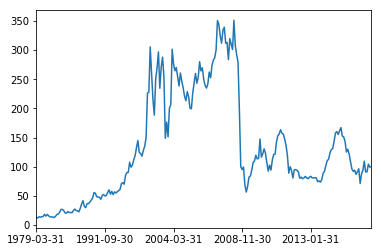

In [27]:
plot_data.plot()